# Data Cleaning & Exploration

## Libraries

In [28]:
import pandas as pd
import numpy as np
import re
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## DF basics

In [37]:
df = pd.read_csv('../Data/Google-Playstore.csv')

In [30]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [31]:
df.shape

(1118136, 23)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

### Drop NaNs

In [33]:
df.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

In [ ]:
# drop Nans in rating/rating count, installs/minimum installs (all columns with numerical values)

In [44]:
df = df.dropna(subset=['Rating', 'Installs', 'App Name', 'Category'])

In [45]:
df.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                    0
Rating Count              0
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                      0
Minimum Android        2011
Developer Id              2
Developer Website    411598
Developer Email          22
Released                946
Last Updated              0
Content Rating            0
Privacy Policy       152426
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

### Values

In [42]:
# Check for values
df['Rating'].unique()

array([3.6, 4.3, 4.2, 3.5, 4.4, 4. , 4.1, 3.3, 3. , 3.1, 3.2, 2.8, 4.5,
       4.9, 3.7, 3.9, 4.7, 0. , 1.1, 3.8, 3.4, 2.6, 4.6, 4.8, 2.4, 2.7,
       2. , 2.3, 2.2, 1.9, 5. , 2.1, 2.9, 2.5, 1.5, 1.7, 1.8, 1.6, 1.4,
       1.2, 1.3, 1. ])

In [43]:
df['Category'].value_counts()

Education                  114865
Music & Audio              104441
Entertainment               81896
Books & Reference           78886
Personalization             73418
Tools                       68273
Lifestyle                   54434
Business                    41835
Health & Fitness            31269
Productivity                30087
Photography                 28873
Travel & Local              25775
Finance                     24673
Puzzle                      24642
Food & Drink                24112
Sports                      21951
News & Magazines            21515
Shopping                    20320
Casual                      19981
Communication               18235
Arcade                      17376
Social                      16877
Simulation                  15068
Medical                     12468
Action                      12330
Art & Design                12270
Educational                 11288
Maps & Navigation           10391
Adventure                   10024
Video Players 

In [54]:
df['Currency'].unique() # whats up with XXX? > aufräumen mit 'other' ?

array(['USD', 'XXX', 'EUR', 'RUB', 'ILS', 'VND', 'JPY', 'ZAR', 'LBP',
       'AUD', 'TWD', 'HKD', 'UAH', 'SEK', 'KRW', 'PKR', 'INR', 'CZK',
       'CAD', 'TRY', 'KZT', 'SGD', 'IDR', 'DZD', 'AED', 'CHF', 'GBP',
       'THB', 'BGN', 'SAR', 'DKK', 'NGN', 'BDT', 'NOK', 'HUF', 'KES',
       'LKR', 'NZD', 'MXN', 'RSD', 'MYR', 'BRL', 'COP', 'PEN', 'HRK',
       'BOB', 'CRC', 'PLN', 'PHP', 'EGP', 'GHS', 'CLP', 'TZS', 'RON'],
      dtype=object)

In [55]:
df['Currency'].value_counts()

USD    1069376
XXX      41208
EUR        118
INR        101
PKR         53
TRY         40
BRL         40
GBP         37
RUB         29
VND         18
HKD         17
IDR         16
SAR         15
JPY         15
CAD         14
BDT         13
CHF         13
ILS         11
SGD         10
KRW         10
AED          9
UAH          9
NGN          8
BGN          8
AUD          7
THB          7
SEK          7
PLN          6
COP          5
NOK          5
PHP          4
LKR          4
CZK          4
MXN          4
EGP          4
TWD          3
RON          3
ZAR          3
MYR          3
PEN          3
CLP          3
LBP          2
GHS          2
KES          2
DKK          2
HUF          2
NZD          2
KZT          1
DZD          1
TZS          1
BOB          1
RSD          1
CRC          1
HRK          1
Name: Currency, dtype: int64

In [50]:
df['Size'].value_counts() # into integer? mb, kb..M &k removal?

Varies with device    30694
11M                   29393
12M                   26461
13M                   22913
14M                   21693
                      ...  
9.0k                      1
262M                      1
384M                      1
323M                      1
275M                      1
Name: Size, Length: 1482, dtype: int64

In [52]:
df['Content Rating'].value_counts() # clean up?

Everyone           962526
Teen                99053
Mature 17+          31782
Everyone 10+        17802
Unrated                66
Adults only 18+        53
Name: Content Rating, dtype: int64

In [22]:
df['Minimum Android'].unique() # min version required >> organize?

array(['2.3 and up', '5.1 and up', '4.1 and up', '4.4 and up',
       '5.0 and up', '6.0 and up', '4.2 and up', '4.0 and up',
       'Varies with device', '8.0 and up', '7.0 and up', '3.2 and up',
       '1.5 and up', '4.3 and up', '4.0.3 and up', '2.2 and up',
       '2.1 and up', '7.1 and up', '4.4W and up', '2.3.3 and up',
       '3.0 and up', '1.6 and up', '4.1 - 8.0', nan, '2.0 and up',
       '2.0.1 and up', '3.1 and up', '4.1 - 7.0', '1.0 and up',
       '4.4 - 5.1', '2.3 - 4.4', '2.3 - 4.4W', '1.1 and up', '5.0 - 6.0',
       '2.2 - 4.3', '2.3 - 5.1', '4.0.3 - 8.0', '4.2 - 7.1.1',
       '4.3 - 4.4W', '4.0 - 4.4', '4.1 - 4.4', '4.1 - 6.0', '8.0',
       '2.1 - 5.0', '4.1 - 4.3', '1.5 - 2.1', '4.1 - 5.1', '7.0',
       '2.3 - 3.2', '4.4', '2.3.3 - 6.0', '4.1 - 7.1.1', '4.0 - 4.4W',
       '4.1 - 4.4W', '4.0.3 - 7.1.1', '2.2', '5.0 - 8.0', '3.0 - 5.0',
       '4.0 - 6.0', '4.4 - 7.1.1', '2.2 - 3.2', '2.3 - 4.0.2',
       '2.1 - 4.4', '2.2 - 4.0.4', '4.0 - 5.0', '6.0 - 7.1.1',
   

In [53]:
df['Minimum Installs'].value_counts() # zusammenfassen?

1.000000e+03    197466
1.000000e+02    176192
1.000000e+04    157465
1.000000e+01    102678
5.000000e+02     82736
1.000000e+05     80118
5.000000e+03     79917
5.000000e+01     61208
5.000000e+04     51393
1.000000e+00     28469
1.000000e+06     27010
5.000000e+00     25226
5.000000e+05     20680
0.000000e+00      8826
5.000000e+06      5498
1.000000e+07      5168
5.000000e+07       695
1.000000e+08       423
5.000000e+08        54
1.000000e+09        47
5.000000e+09        12
1.000000e+10         1
Name: Minimum Installs, dtype: int64

### Datetime conversions

In [ ]:
# released/last updated into datetime? > add column age from released? last updated to ??

In [ ]:
# data exploration > graphs?

# Data prepocessing for ML

In [ ]:
# Data prepocessing for machine learning dataset:

# CORRELATIONS: drop correlations/heatmap
# OUTLIERS: check
# DUMMIES: 20,21,22, 8 bool into 1 and 0
# object columns into dummies? which ones?


In [10]:
# drop 0s
# class inbalance > downsampling? (manually (sample function, tts > train set downsampling, not testset!) or lib)

In [11]:
df[df['Rating']== 0].count()

App Name             433265
App Id               433265
Category             433265
Rating               433265
Rating Count         433265
Installs             433265
Minimum Installs     433265
Maximum Installs     433265
Free                 433265
Price                433265
Currency             433265
Size                 433265
Minimum Android      432054
Developer Id         433265
Developer Website    245076
Developer Email      433259
Released             433203
Last Updated         433265
Content Rating       433265
Privacy Policy       368015
Ad Supported         433265
In App Purchases     433265
Editors Choice       433265
dtype: int64

<AxesSubplot:>

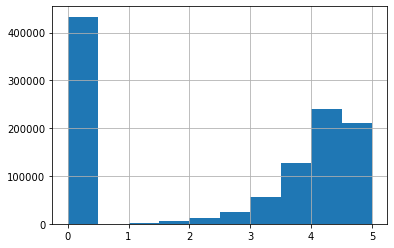

In [9]:
df['Rating'].hist() # unbalanced ds  (drop all 0s and work with the rest)